### Basic ISC



#### Import modules

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os, nilearn, pickle, glob,shutil
from nilearn import plotting, input_data, datasets
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from utils import *
import warnings
warnings.simplefilter("ignore")

#### Variables, Names

In [17]:
usa_isc_npy_file           = '../data/05_results/usa_isc_perm5000_FDRq05.npy'
aus_isc_npy_file           = '../data/05_results/aus_isc_perm5000_FDRq05.npy'

aus_fmri_ts_file           = '../data/03_extract_ts_aus/ts_array_shen268_pauli16_aan9.npy'
usa_fmri_ts_file         = '../data/03_extract_ts_usa/usa_ts_array_shen268_regional_average_ages13-99.npy'

threshold = 0.1

#### Load previously computed ISC and TimeSeries

In [18]:
# load timeseries, swap axes
usa_ts_data = np.load(usa_fmri_ts_file)
usa_ts_data = np.swapaxes(usa_ts_data, 0, 2)
usa_ts_data = np.swapaxes(usa_ts_data, 0, 1)
print("Shape of time series structure: " + str(usa_ts_data.shape))

aus_ts_data = np.load(aus_fmri_ts_file)[:,:,0:268] #drop nonoverlapping 
aus_ts_data = np.swapaxes(aus_ts_data, 0, 2)
aus_ts_data = np.swapaxes(aus_ts_data, 0, 1)
print("Shape of time series structure: " + str(aus_ts_data.shape))

usa_isc = np.load(usa_isc_npy_file)
aus_isc = np.load(aus_isc_npy_file)[:, :268] #drop nonoverlapping 
print(usa_isc.shape)
print(aus_isc.shape)


Shape of time series structure: (168, 268, 33)
Shape of time series structure: (380, 268, 200)
(1, 268)
(1, 268)


#### Assess correlation of ISC pattern across continents

In [19]:
np.corrcoef(usa_isc, aus_isc)[0,1]

df_isc = pd.DataFrame({'AUS':aus_isc[0,:], 'USA':usa_isc[0,:],})
df_isc.corr()

,AUS,USA
AUS,1.000000,0.907001
USA,0.907001,1.000000


In [21]:
# same, but thresholding out low ISC

usa_isc2 = usa_isc.copy()
usa_isc2[usa_isc< threshold] = np.nan

aus_isc2 = aus_isc.copy()
aus_isc2[aus_isc< threshold] = np.nan

df_isc_thresh = pd.DataFrame({'AUS (thresh)':aus_isc2[0,:], 'USA (thresh)':usa_isc2[0,:],})
df_isc_thresh.corr()

,AUS (thresh),USA (thresh)
AUS (thresh),1.00000,0.62362
USA (thresh),0.62362,1.00000


#### Scatterplot

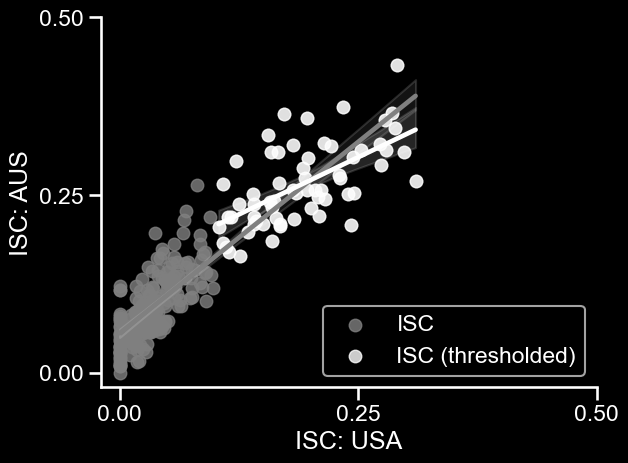

In [22]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

sns.regplot(x=usa_isc, y=aus_isc, color = 'gray', label = 'ISC')

sns.regplot(x=usa_isc2,y=aus_isc2, color = 'white', label = 'ISC (thresholded)')

#plt.axis('square');
plt.xlim(-0.02,.45);
plt.ylim(-0.02,.45);
plt.xticks(ticks=[0, .25,.5])
plt.yticks(ticks=[0, .25,.5])
plt.legend(loc = 4)
plt.xlabel('ISC: USA')
plt.ylabel('ISC: AUS')
sns.despine()

#### Plot Exemplary Timeseries

In [43]:
print(usa_ts_data.shape)
print(aus_ts_data.shape)

usa_data1 = np.mean(usa_ts_data[:,:,:16], axis = 2)
usa_data2 = np.mean(usa_ts_data[:,:,16:], axis = 2)

aus_data1 = np.mean(aus_ts_data[:,:,:100], axis = 2)
aus_data2 = np.mean(aus_ts_data[:,:,100:], axis = 2)

(168, 268, 33)
(380, 268, 200)


In [69]:
import scipy.signal as signal

# USA
target_length = 380
n_regions = usa_ts_data.shape[1]
n_subjects = usa_ts_data.shape[2]
res = []
resampled_usa_data = np.zeros((target_length, n_regions, n_subjects))

for curr_region in range(n_regions):
    for curr_subject in range(n_subjects):
        resampled_usa_data[:, curr_region, curr_subject] = signal.resample(usa_ts_data[4:162, curr_region, curr_subject], target_length)
        #res.append(np.mean(resampled_usa_data[:, curr_region, curr_subject]))
print(resampled_usa_data.shape)
#print(resampled_usa_data[:370,:,:].shape)

resampled_usa_data = resampled_usa_data[:target_length,:,:]
resampled_usa_data1 = np.nanmean(resampled_usa_data[:,:,:16], axis = 2)
resampled_usa_data2 = np.nanmean(resampled_usa_data[:,:,16:], axis = 2)

# AUS
resampled_aus_data = aus_ts_data[:, :, :]
resampled_aus_data1 = np.mean(resampled_aus_data[:,:,:100], axis = 2)
resampled_aus_data2 = np.mean(resampled_aus_data[:,:,100:], axis = 2)


(380, 268, 33)


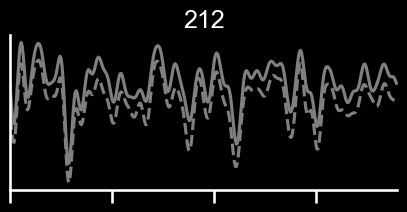

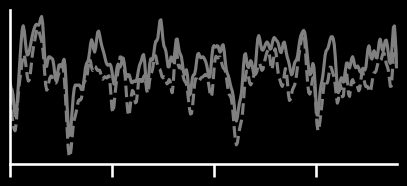

In [114]:
for curr_region in range(212,213):

    plt.figure(figsize = (5,2))
    #plt.subplot(2,1,2)
    plt.plot(resampled_aus_data1[:, curr_region], color = 'gray', linestyle = 'dashed')  #check
    plt.plot(resampled_aus_data2[:, curr_region]+0.5, color = 'gray')
    plt.xlim([0, 380])
    plt.yticks([])
    plt.title(str(curr_region))
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    sns.despine()
    
    plt.figure(figsize = (5,2))
    #plt.subplot(2,1,1)
    plt.plot(resampled_usa_data1[:, curr_region], color = 'gray', linestyle = 'dashed')
    plt.plot(resampled_usa_data2[:, curr_region]+0.5, color = 'gray')
    plt.xlim([0, 380])
    plt.yticks([])
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    sns.despine()
    plt.show()

In [115]:
print(resampled_aus_data.shape)
print(resampled_usa_data.shape)


combined_usa_aus_data = np.dstack([resampled_aus_data, resampled_usa_data])
print(combined_usa_aus_data.shape)

input_isc = partly_isc_matrix(combined_usa_aus_data, pairwise=True, summary_statistic=None)
input_isc.shape

(380, 268, 200)
(380, 268, 33)
(380, 268, 233)
Assuming 233 subjects with 380 time points and 268 voxel(s) or ROI(s).


(233, 233)

In [116]:
input_isc = partly_isc(combined_usa_aus_data, pairwise=True, summary_statistic=None)
input_isc.shape

Assuming 233 subjects with 380 time points and 268 voxel(s) or ROI(s).


(27028, 268)

212


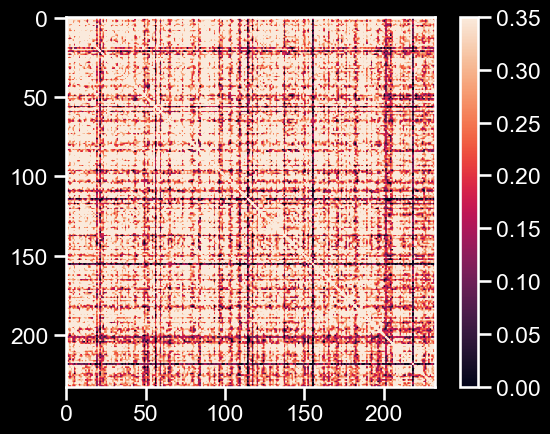

In [117]:
from scipy.spatial.distance import squareform
print(curr_region)
plt.imshow(np.corrcoef(combined_usa_aus_data[:,curr_region,:].T), vmin = 0.00, vmax = 0.35)# cmap = 'seismic')
plt.colorbar()

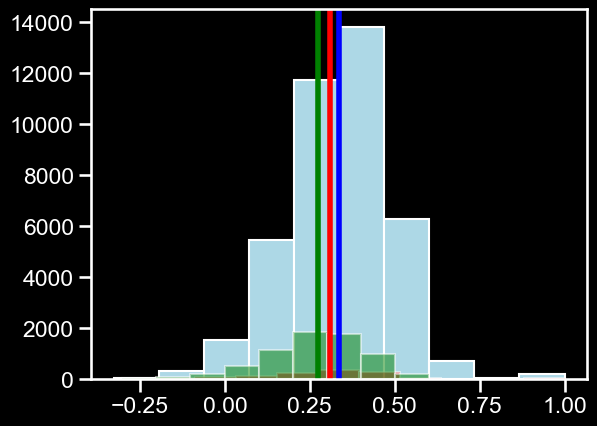

In [118]:
res = np.corrcoef(combined_usa_aus_data[:,curr_region,:].T)

plt.hist(res[:200,:200].flatten(), color = 'lightblue')
plt.axvline(res[:200,:200].flatten().mean(), linestyle='-', color='blue', linewidth=4);

plt.hist(res[200:233,200:233].flatten(), color = 'red', alpha = 0.5)
plt.axvline(res[200:233,200:233].flatten().mean(), linestyle='-', color='red', linewidth=4);

plt.hist(res[200:233,0:200].flatten(), color = 'green', alpha = 0.5)
plt.axvline(res[200:233,0:200].flatten().mean(), linestyle='-', color='green', linewidth=4);




### Conclusion

We find robust ISC across the groups of viewers. 

While (imo) not very surprising, this is affirming.

Moreover, the cortical distribution of ISC mirrors that of the previous study. 

Thus provides solid grounds to examine more fine-grained questions, particularly ISC between twins in the following notebooks.
